
## **Assignment 2 PCA-Dimensionality Reduction**
---

**Comparision with t-SNE(t-Distributed Stochastic Neighbor Embedding)**

PCA is a linear technique that projects data onto a lower-dimensional space by maximizing the variance. It identifies the principal components (directions of maximum variance) in the dataset.

### **Advantages:**
	•	Fast and computationally efficient.
	•	Captures the global structure of the data.
	•	Provides insight into which features contribute most to the variance.

---



In [38]:
# to import all the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.preprocessing import StandardScaler 

Preprocessing steps:
1. Separate the data into features and labels.
2. Standardize the features.

In [ ]:
# Preprocessing of data
data = pd.read_csv('winequality-white.csv', delimiter=';')
print("dataset loaded succesfully. Shape", data.shape)

# Cleaning up data, removing rwos with missig values.
data.dropna(inplace=True)

# Inspect the first few rows
print(data.head())

# Data Normalization, quality is assumed to be the label
features = data.drop('quality', axis=1)
labels = data['quality']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

dataset loaded succesfully. Shape (4898, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6

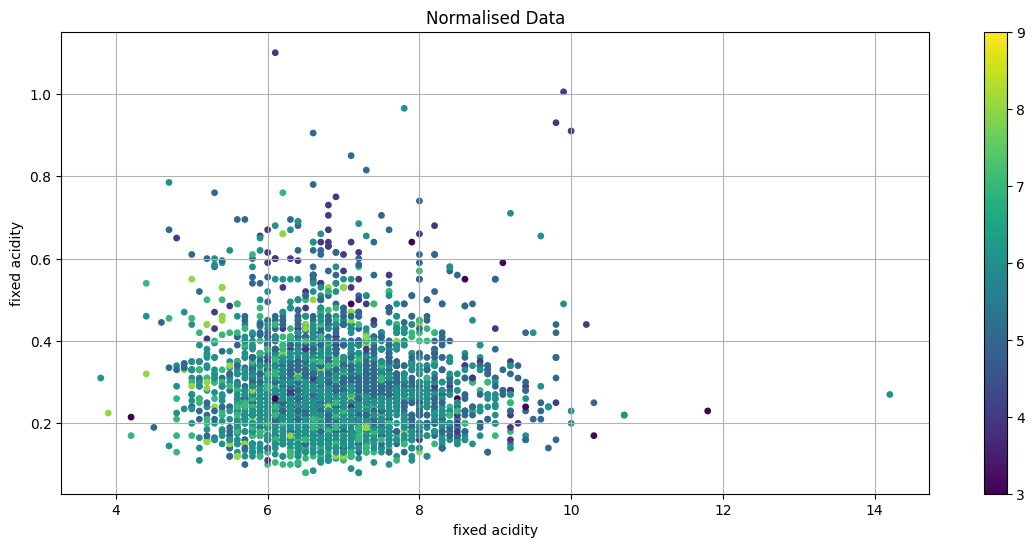

In [ ]:
# Plotting the graph after normalization/Standardisation
plt.figure(figsize=(14, 6))

scatter = plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=labels, cmap='viridis', s=15)
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[0])
plt.title("Normalised Data")
plt.grid()
plt.colorbar(scatter)

### Apply PCA to reduce the dattaset to 2 dimensions.

In [ ]:
# Splitting into 3 components.
pca = PCA(n_components=3)
data_pca = pca.fit_transform(features_scaled)

# Printing the explained variance ratio for insight
print("PCA Explained Variance Ratio: ", pca.explained_variance_ratio_)

PCA Explained Variance Ratio:  [0.29293217 0.14320363 0.11106103]


In [29]:
# ExtExtract principal components and interpret them.
# The components_ attribute shows the directions of maximum variance.
print("Principal Components (directions):")
print(pca.components_)

Principal Components (directions):
[[ 0.15721845  0.00508949  0.14404984  0.42740837  0.21201106  0.30033439
   0.4066522   0.5115236  -0.12883188  0.04337933 -0.43723783]
 [ 0.58755821 -0.05172805  0.34529456 -0.00874939  0.00880031 -0.29035514
  -0.24403239 -0.0062968  -0.5813444  -0.22269537  0.03556867]
 [-0.1213683   0.5909715  -0.50439688  0.21431987  0.10236744 -0.27941005
  -0.12437527  0.12920286 -0.1266715  -0.43324404 -0.10590316]]


In [30]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio (PCA):", explained_variance)
total_variance = explained_variance.sum()
print("Total Variance Captured:", total_variance)

Explained Variance Ratio (PCA): [0.29293217 0.14320363 0.11106103]
Total Variance Captured: 0.5471968328697147


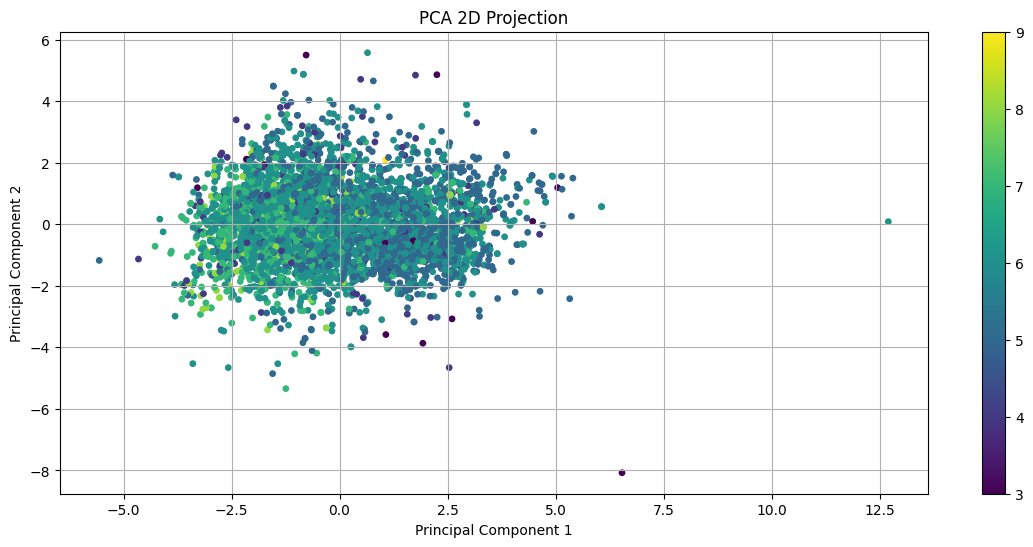

In [ ]:
# Plotting the graph after PCA
plt.figure(figsize=(14, 6))

scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=15)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D Projection")
plt.grid()
plt.colorbar(scatter)

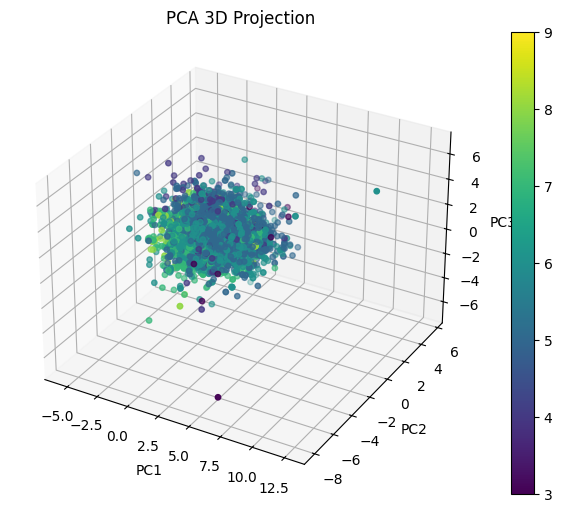

In [ ]:
# Plotting the graph for 3D Projection
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter3d = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2],
                        c=labels, cmap='viridis', s=15)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA 3D Projection")
plt.colorbar(scatter3d, ax=ax)

### Apply t-SNE to reduce the dataset to 2 dimensions.
We will use the same dataset for both PCA and t-SNE. we can adjust the perplexity parameter in t-SNE to see how it affects the output.

In [ ]:
# Applying t-SNE on Data for visualization.
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(features_scaled)

### Visualize the results of PCA and t-SNE. by plotting the reduced dataset.

#### PCA Visualization:
* Shows the global structure of the data.
* The explained variance ratio of the first two principal components.

#### t-SNE Visualization:
* Often reveals clusters or local groupings that might be hidden in the global structure.
* useful for understanding local structures even if the overall distances might not be directly comparable.

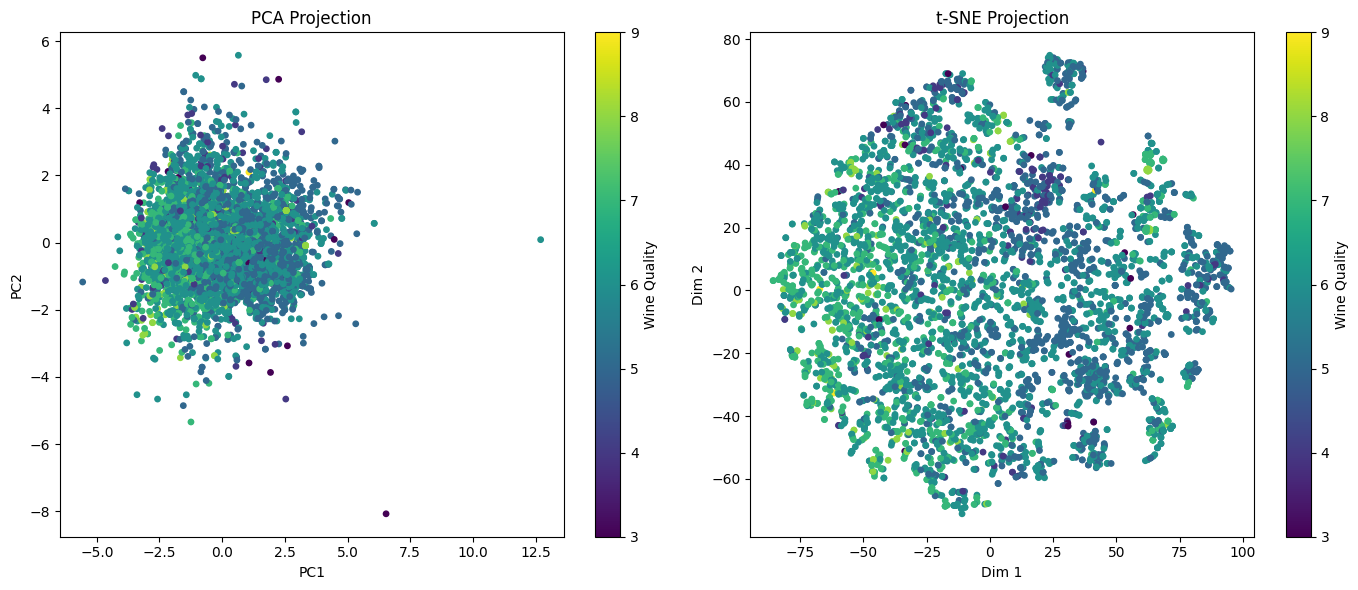

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# PCA plot
scatter1 = ax1.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=15)
ax1.set_title("PCA Projection")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
plt.colorbar(scatter1, ax=ax1, label = 'Wine Quality')


# t-SNE Plot
scatter2 = ax2.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis', s=15)
ax2
ax2.set_title("t-SNE Projection")
ax2.set_xlabel("Dim 1")
ax2.set_ylabel("Dim 2")
plt.colorbar(scatter2, ax=ax2, label = 'Wine Quality')

plt.tight_layout()
plt.show()
